In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [40]:
sensor_data_path = '/content/drive/MyDrive/city_day.csv'
# Load the dataset
df = pd.read_csv(sensor_data_path)


In [41]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [42]:
pmean=df["PM2.5"].mean()
df["PM2.5"].fillna(pmean,inplace=True)

In [43]:
pmmean=df["PM10"].mean()
df["PM10"].fillna(pmmean,inplace=True)

In [44]:
nmean=df["NO"].mean()
df["NO"].fillna(nmean,inplace=True)

In [45]:
nomean=df["NO2"].mean()
df["NO2"].fillna(nomean,inplace=True)

In [46]:
noxmean=df["NOx"].mean()
df["NOx"].fillna(noxmean,inplace=True)

In [47]:
nhmean=df["NH3"].mean()
df["NH3"].fillna(nhmean,inplace=True)

In [48]:
cmean=df["CO"].mean()
df["CO"].fillna(cmean,inplace=True)

In [49]:
smean=df["SO2"].mean()
df["SO2"].fillna(smean,inplace=True)

In [50]:
omean=df["O3"].mean()
df["O3"].fillna(omean, inplace=True)

In [51]:
bmean=df["Benzene"].mean()
df["Benzene"].fillna(bmean,inplace=True)

In [52]:
tmean=df["Toluene"].mean()
df["Toluene"].fillna(tmean,inplace=True)

In [53]:
xmean=df["Xylene"].mean()
df["Xylene"].fillna(xmean,inplace=True)

In [54]:
amean=df["AQI"].mean()
df["AQI"].fillna(amean,inplace=True)

In [55]:
df=df.drop('AQI_Bucket',axis=1)

In [56]:
df.isna().sum()

City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime

import math
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm
plt.style.use("fivethirtyeight")
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [59]:
df["Date"] = pd.to_datetime(df["Date"])

In [60]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581


In [61]:
df['Date']=df["Date"].dt.date

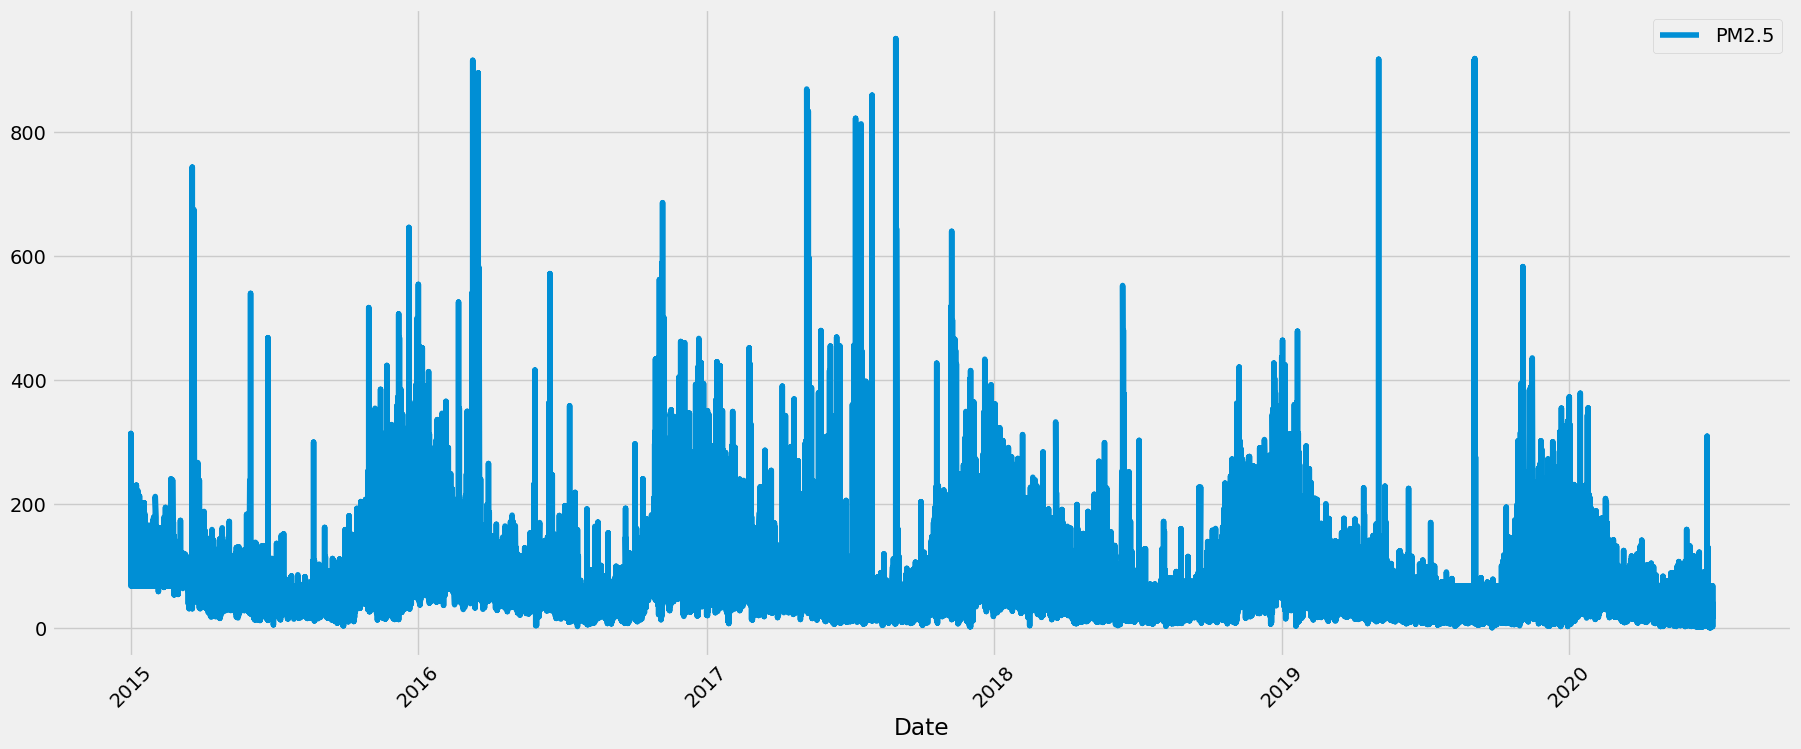

In [62]:
df.plot(x='Date',y='PM2.5',figsize=(20,8))
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Date'>

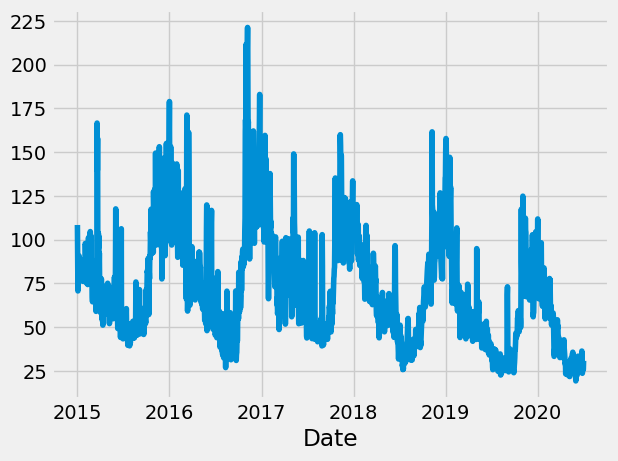

In [64]:
df.groupby('Date')['PM2.5'].mean().plot()

<Axes: xlabel='Date', ylabel='PM2.5'>

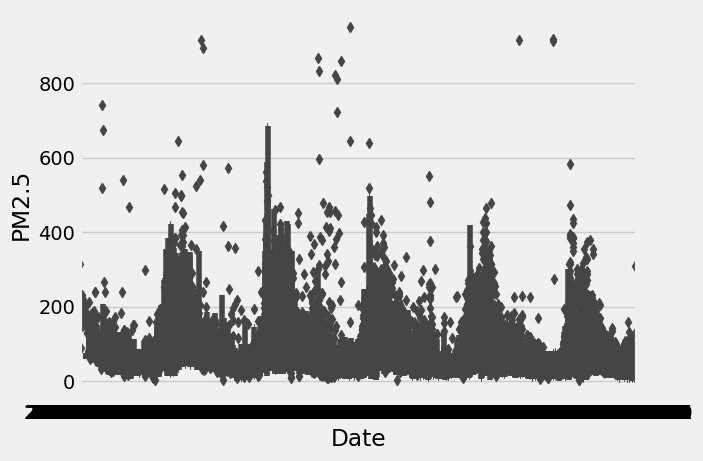

In [65]:
df_year=df.loc[:,['Date','PM2.5']]
sns.boxplot(x='Date', y='PM2.5',data=df_year)

In [82]:
df_date=pd.DataFrame(df.groupby('Date')['PM2.5'].mean())
df_date
df_pm10=pd.DataFrame(df.groupby('Date')['PM10'].mean())
df_pm10
df_NO=pd.DataFrame(df.groupby('Date')['NO'].mean())
df_NO
df_NO2=pd.DataFrame(df.groupby('Date')['NO2'].mean())
df_NO2
df_NOx=pd.DataFrame(df.groupby('Date')['NOx'].mean())
df_NOx
df_NH3=pd.DataFrame(df.groupby('Date')['NH3'].mean())
df_NH3
df_CO=pd.DataFrame(df.groupby('Date')['CO'].mean())
df_CO
df_SO2=pd.DataFrame(df.groupby('Date')['SO2'].mean())
df_SO2
df_O3=pd.DataFrame(df.groupby('Date')['O3'].mean())
df_O3
df_Ben=pd.DataFrame(df.groupby('Date')['Benzene'].mean())
df_Ben
df_Tol=pd.DataFrame(df.groupby('Date')['Toluene'].mean())
df_Tol
df_Xyl=pd.DataFrame(df.groupby('Date')['Xylene'].mean())
df_Xyl



,Xylene
Date,
2015-01-01,3.175064
2015-01-02,2.878397
2015-01-03,2.241731
2015-01-04,2.094340
2015-01-05,2.214340
...,...
2020-06-27,2.540074
2020-06-28,2.543151
2020-06-29,2.584689


<Axes: xlabel='Date'>

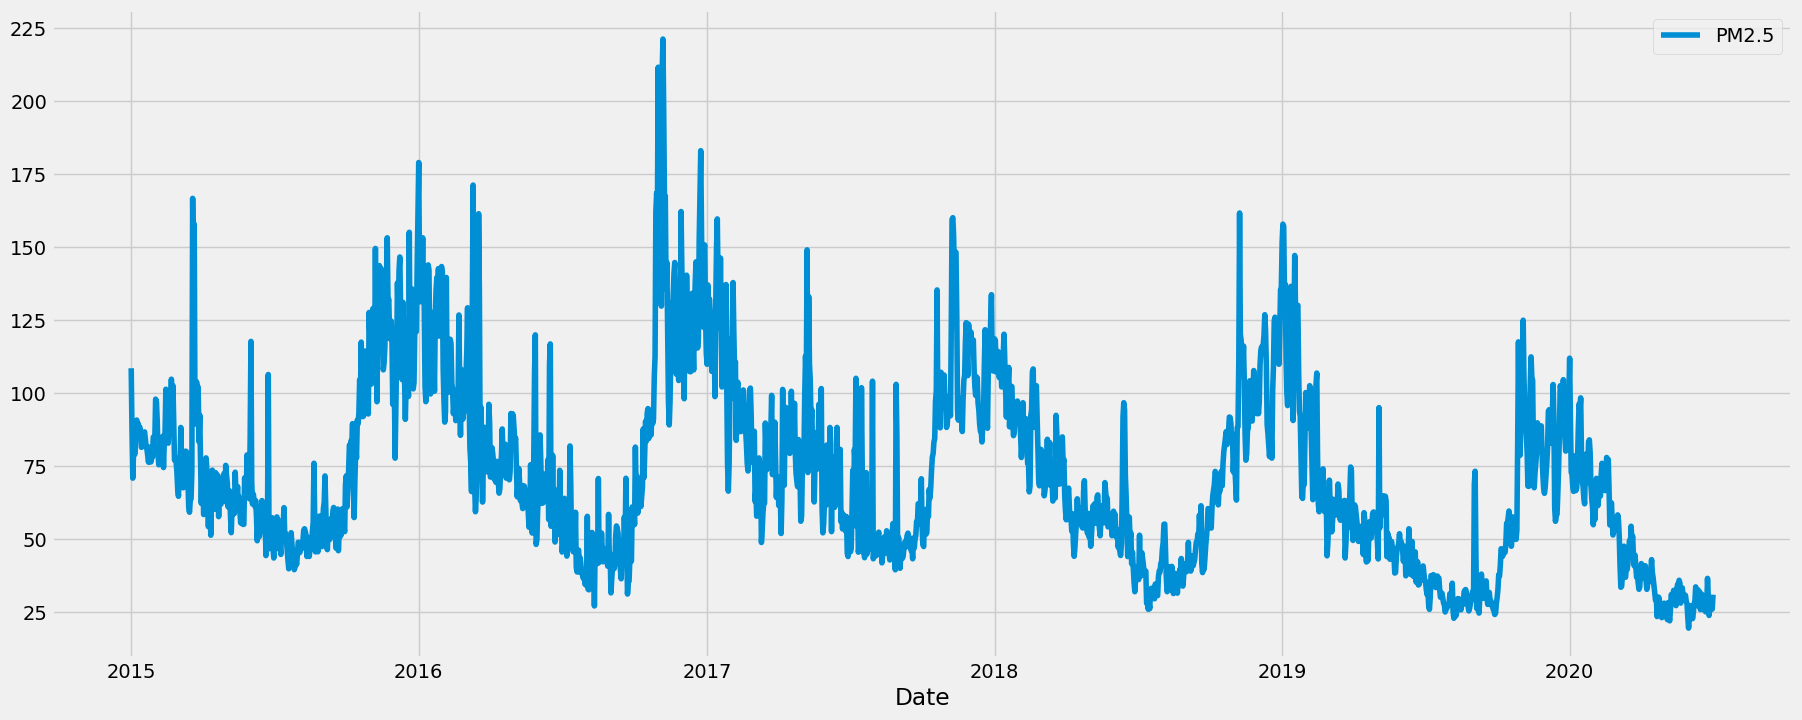

In [67]:
df_date.plot(figsize=(20,8))

In [84]:
dataset  = df_date.values
dataset2 = df_pm10.values
dataset3  = df_NO.values
dataset4 = df_NO2.values
dataset5  = df_NOx.values
dataset6 = df_NH3.values
dataset7  = df_CO.values
dataset8 = df_SO2.values
dataset9  = df_O3.values
dataset10 = df_Ben.values
dataset11  = df_Tol.values
dataset12 = df_Xyl.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len2 = math.ceil(len(dataset2)*.8)
training_data_len3 = math.ceil(len(dataset3)*.8)
training_data_len4 = math.ceil(len(dataset4)*.8)
training_data_len5 = math.ceil(len(dataset5)*.8)
training_data_len6 = math.ceil(len(dataset6)*.8)
training_data_len7 = math.ceil(len(dataset7)*.8)
training_data_len8 = math.ceil(len(dataset8)*.8)
training_data_len9 = math.ceil(len(dataset9)*.8)
training_data_len10 = math.ceil(len(dataset10)*.8)
training_data_len11 = math.ceil(len(dataset11)*.8)
training_data_len12 = math.ceil(len(dataset12)*.8)
training_data_len
training_data_len2
training_data_len3
training_data_len4
training_data_len5
training_data_len6
training_data_len7
training_data_len8
training_data_len9
training_data_len10
training_data_len11
training_data_len12

1608

In [86]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(dataset)
scaled_data2 = sc.fit_transform(dataset2)
scaled_data3 = sc.fit_transform(dataset3)
scaled_data4 = sc.fit_transform(dataset4)
scaled_data5 = sc.fit_transform(dataset5)
scaled_data6 = sc.fit_transform(dataset6)
scaled_data7= sc.fit_transform(dataset7)
scaled_data8 = sc.fit_transform(dataset8)
scaled_data9 = sc.fit_transform(dataset9)
scaled_data10 = sc.fit_transform(dataset10)
scaled_data11 = sc.fit_transform(dataset11)
scaled_data12 = sc.fit_transform(dataset12)

print(scaled_data)
print(scaled_data2)
print(scaled_data3)
print(scaled_data4)
print(scaled_data5)
print(scaled_data6)
print(scaled_data7)
print(scaled_data8)
print(scaled_data9)
print(scaled_data10)
print(scaled_data11)
print(scaled_data12)


[[0.44116305]
 [0.33629059]
 [0.25456536]
 ...
 [0.03266936]
 [0.03235312]
 [0.05676984]]
[[0.78138313]
 [0.48470605]
 [0.36403825]
 ...
 [0.04573482]
 [0.01074322]
 [0.06765676]]
[[0.21175627]
 [0.19937939]
 [0.13081542]
 ...
 [0.08557632]
 [0.06564335]
 [0.06011985]]
[[0.14750889]
 [0.12503497]
 [0.14937271]
 ...
 [0.04404564]
 [0.05410654]
 [0.04191378]]
[[0.25786782]
 [0.20580148]
 [0.12507677]
 ...
 [0.06309952]
 [0.06869208]
 [0.05298018]]
[[0.12411376]
 [0.13659665]
 [0.17757311]
 ...
 [0.02543537]
 [0.00563391]
 [0.        ]]
[[0.20002646]
 [0.18045308]
 [0.41321571]
 ...
 [0.01839722]
 [0.01824553]
 [0.01755451]]
[[0.82131722]
 [0.79718512]
 [1.        ]
 ...
 [0.11976413]
 [0.12039951]
 [0.08883593]]
[[0.61361748]
 [0.19101734]
 [0.11352862]
 ...
 [0.28292823]
 [0.28512069]
 [0.15696781]]
[[0.03881898]
 [0.04063334]
 [0.02759687]
 ...
 [0.02465698]
 [0.02824692]
 [0.02088936]]
[[0.09862678]
 [0.10861439]
 [0.15244716]
 ...
 [0.11025467]
 [0.10219137]
 [0.10489429]]
[[0.177716

In [87]:
train_data = scaled_data[0:training_data_len, :]
train_data2 = scaled_data2[0:training_data_len2, :]
train_data3 = scaled_data3[0:training_data_len3, :]
train_data4 = scaled_data4[0:training_data_len4, :]
train_data5 = scaled_data5[0:training_data_len5, :]
train_data6 = scaled_data6[0:training_data_len6, :]
train_data7 = scaled_data7[0:training_data_len7, :]
train_data8 = scaled_data8[0:training_data_len8, :]
train_data9 = scaled_data9[0:training_data_len9, :]
train_data10 = scaled_data10[0:training_data_len10, :]
train_data11 = scaled_data11[0:training_data_len11, :]
train_data12 = scaled_data12[0:training_data_len12, :]
x_train = []
y_train = []
x_train2 = []
y_train2 = []
x_train3 = []
y_train3 = []
x_train4 = []
y_train4 = []
x_train5 = []
y_train5 = []
x_train6 = []
y_train6 = []
x_train7 = []
y_train7 = []
x_train8 = []
y_train8 = []
x_train9 = []
y_train9 = []
x_train10 = []
y_train10 = []
x_train11 = []
y_train11 = []
x_train12 = []
y_train12 = []
num = 60
for i in range(num, len(train_data)):
    x_train.append(train_data[i-num:i , 0])
    y_train.append(train_data[i , 0])
for i in range(num, len(train_data2)):
    x_train2.append(train_data2[i-num:i , 0])
    y_train2.append(train_data2[i , 0])
for i in range(num, len(train_data3)):
    x_train3.append(train_data3[i-num:i , 0])
    y_train3.append(train_data3[i , 0])
for i in range(num, len(train_data4)):
    x_train4.append(train_data4[i-num:i , 0])
    y_train4.append(train_data4[i , 0])
for i in range(num, len(train_data5)):
    x_train5.append(train_data5[i-num:i , 0])
    y_train5.append(train_data5[i , 0])
for i in range(num, len(train_data6)):
    x_train6.append(train_data6[i-num:i , 0])
    y_train6.append(train_data6[i , 0])
for i in range(num, len(train_data7)):
    x_train7.append(train_data7[i-num:i , 0])
    y_train7.append(train_data7[i , 0])
for i in range(num, len(train_data8)):
    x_train8.append(train_data8[i-num:i , 0])
    y_train8.append(train_data8[i , 0])
for i in range(num, len(train_data9)):
    x_train9.append(train_data9[i-num:i , 0])
    y_train9.append(train_data9[i , 0])
for i in range(num, len(train_data10)):
    x_train10.append(train_data10[i-num:i , 0])
    y_train10.append(train_data10[i , 0])
for i in range(num, len(train_data11)):
    x_train11.append(train_data11[i-num:i , 0])
    y_train11.append(train_data11[i , 0])
for i in range(num, len(train_data12)):
    x_train12.append(train_data12[i-num:i , 0])
    y_train12.append(train_data12[i , 0])

In [88]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1548, 60, 1)

In [89]:
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)
x_train2 = np.reshape(x_train2, (x_train2.shape[0],x_train2.shape[1],1))
x_train2.shape

(1548, 60, 1)

In [90]:
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)
x_train3 = np.reshape(x_train3, (x_train3.shape[0],x_train3.shape[1],1))
x_train3.shape

(1548, 60, 1)

In [91]:
x_train4, y_train4 = np.array(x_train4), np.array(y_train4)
x_train4 = np.reshape(x_train4, (x_train4.shape[0],x_train4.shape[1],1))
x_train4.shape

(1548, 60, 1)

In [92]:
x_train5, y_train5 = np.array(x_train5), np.array(y_train5)
x_train5 = np.reshape(x_train5, (x_train5.shape[0],x_train5.shape[1],1))
x_train5.shape

(1548, 60, 1)

In [93]:
x_train6, y_train6 = np.array(x_train6), np.array(y_train6)
x_train6 = np.reshape(x_train6, (x_train6.shape[0],x_train6.shape[1],1))
x_train6.shape

(1548, 60, 1)

In [94]:
x_train7, y_train7 = np.array(x_train7), np.array(y_train7)
x_train7 = np.reshape(x_train7, (x_train7.shape[0],x_train7.shape[1],1))
x_train7.shape

(1548, 60, 1)

In [95]:
x_train8, y_train8 = np.array(x_train8), np.array(y_train8)
x_train8 = np.reshape(x_train8, (x_train8.shape[0],x_train8.shape[1],1))
x_train8.shape

(1548, 60, 1)

In [96]:
x_train9, y_train9 = np.array(x_train9), np.array(y_train9)
x_train9 = np.reshape(x_train9, (x_train9.shape[0],x_train9.shape[1],1))
x_train9.shape

(1548, 60, 1)

In [97]:
x_train10, y_train10 = np.array(x_train10), np.array(y_train10)
x_train10 = np.reshape(x_train10, (x_train10.shape[0],x_train10.shape[1],1))
x_train10.shape

(1548, 60, 1)

In [98]:
x_train11, y_train11 = np.array(x_train11), np.array(y_train11)
x_train11 = np.reshape(x_train11, (x_train11.shape[0],x_train11.shape[1],1))
x_train11.shape

(1548, 60, 1)

In [99]:
x_train12, y_train12 = np.array(x_train12), np.array(y_train12)
x_train12 = np.reshape(x_train12, (x_train12.shape[0],x_train12.shape[1],1))
x_train12.shape

(1548, 60, 1)

In [100]:
model = Sequential()
model2 = Sequential()
model3 = Sequential()
model4 = Sequential()
model5 = Sequential()
model6 = Sequential()
model7 = Sequential()
model8 = Sequential()
model9 = Sequential()
model10 = Sequential()
model11 = Sequential()
model12 = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model2.add(LSTM(50, return_sequences=True, input_shape=(x_train2.shape[1],1)))
model2.add(LSTM(50, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))
model3.add(LSTM(50, return_sequences=True, input_shape=(x_train3.shape[1],1)))
model3.add(LSTM(50, return_sequences=False))
model3.add(Dense(25))
model3.add(Dense(1))
model4.add(LSTM(50, return_sequences=True, input_shape=(x_train4.shape[1],1)))
model4.add(LSTM(50, return_sequences=False))
model4.add(Dense(25))
model4.add(Dense(1))
model5.add(LSTM(50, return_sequences=True, input_shape=(x_train5.shape[1],1)))
model5.add(LSTM(50, return_sequences=False))
model5.add(Dense(25))
model5.add(Dense(1))
model6.add(LSTM(50, return_sequences=True, input_shape=(x_train6.shape[1],1)))
model6.add(LSTM(50, return_sequences=False))
model6.add(Dense(25))
model6.add(Dense(1))
model7.add(LSTM(50, return_sequences=True, input_shape=(x_train7.shape[1],1)))
model7.add(LSTM(50, return_sequences=False))
model7.add(Dense(25))
model7.add(Dense(1))
model8.add(LSTM(50, return_sequences=True, input_shape=(x_train8.shape[1],1)))
model8.add(LSTM(50, return_sequences=False))
model8.add(Dense(25))
model8.add(Dense(1))
model9.add(LSTM(50, return_sequences=True, input_shape=(x_train9.shape[1],1)))
model9.add(LSTM(50, return_sequences=False))
model9.add(Dense(25))
model9.add(Dense(1))
model10.add(LSTM(50, return_sequences=True, input_shape=(x_train10.shape[1],1)))
model10.add(LSTM(50, return_sequences=False))
model10.add(Dense(25))
model10.add(Dense(1))
model11.add(LSTM(50, return_sequences=True, input_shape=(x_train11.shape[1],1)))
model11.add(LSTM(50, return_sequences=False))
model11.add(Dense(25))
model11.add(Dense(1))
model12.add(LSTM(50, return_sequences=True, input_shape=(x_train12.shape[1],1)))
model12.add(LSTM(50, return_sequences=False))
model12.add(Dense(25))
model12.add(Dense(1))


In [101]:
model.compile(optimizer = "adam", loss = "mean_squared_error")
model2.compile(optimizer = "adam", loss = "mean_squared_error")
model3.compile(optimizer = "adam", loss = "mean_squared_error")
model4.compile(optimizer = "adam", loss = "mean_squared_error")
model5.compile(optimizer = "adam", loss = "mean_squared_error")
model6.compile(optimizer = "adam", loss = "mean_squared_error")
model7.compile(optimizer = "adam", loss = "mean_squared_error")
model8.compile(optimizer = "adam", loss = "mean_squared_error")
model9.compile(optimizer = "adam", loss = "mean_squared_error")
model10.compile(optimizer = "adam", loss = "mean_squared_error")
model11.compile(optimizer = "adam", loss = "mean_squared_error")
model12.compile(optimizer = "adam", loss = "mean_squared_error")

In [102]:
model.fit(x_train,y_train, batch_size=1, epochs=1)
model2.fit(x_train2,y_train2, batch_size=1, epochs=1)
model3.fit(x_train3,y_train3, batch_size=1, epochs=1)
model4.fit(x_train4,y_train4, batch_size=1, epochs=1)
model5.fit(x_train5,y_train5, batch_size=1, epochs=1)
model6.fit(x_train6,y_train6, batch_size=1, epochs=1)
model7.fit(x_train7,y_train7, batch_size=1, epochs=1)
model8.fit(x_train8,y_train8, batch_size=1, epochs=1)
model9.fit(x_train9,y_train9, batch_size=1, epochs=1)
model10.fit(x_train10,y_train10, batch_size=1, epochs=1)
model11.fit(x_train11,y_train11, batch_size=1, epochs=1)
model12.fit(x_train12,y_train12, batch_size=1, epochs=1)

1548/1548 [==============================] - 33s 20ms/step - loss: 0.0050


In [103]:
test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(num, len(test_data)):
      x_test.append(test_data[i-num:i, 0])

test_data2 = scaled_data2[training_data_len2-60: , :]
x_test2 = []
y_test2 = dataset2[training_data_len2:,:]
for i in range(num, len(test_data2)):
      x_test2.append(test_data2[i-num:i, 0])

test_data3 = scaled_data3[training_data_len3-60: , :]
x_test3 = []
y_test3 = dataset3[training_data_len3:,:]
for i in range(num, len(test_data3)):
      x_test3.append(test_data3[i-num:i, 0])

test_data4 = scaled_data4[training_data_len4-60: , :]
x_test4 = []
y_test4 = dataset4[training_data_len4:,:]
for i in range(num, len(test_data4)):
      x_test4.append(test_data4[i-num:i, 0])

test_data5 = scaled_data5[training_data_len5-60: , :]
x_test5 = []
y_test5 = dataset5[training_data_len5:,:]
for i in range(num, len(test_data5)):
      x_test5.append(test_data5[i-num:i, 0])

test_data6 = scaled_data6[training_data_len6-60: , :]
x_test6 = []
y_test6 = dataset6[training_data_len6:,:]
for i in range(num, len(test_data6)):
      x_test6.append(test_data6[i-num:i, 0])


test_data7 = scaled_data7[training_data_len7-60: , :]
x_test7 = []
y_test7 = dataset7[training_data_len7:,:]
for i in range(num, len(test_data7)):
      x_test7.append(test_data7[i-num:i, 0])

test_data8 = scaled_data8[training_data_len8-60: , :]
x_test8 = []
y_test8 = dataset8[training_data_len8:,:]
for i in range(num, len(test_data8)):
      x_test8.append(test_data8[i-num:i, 0])

test_data9 = scaled_data9[training_data_len9-60: , :]
x_test9 = []
y_test9 = dataset9[training_data_len9:,:]
for i in range(num, len(test_data9)):
      x_test9.append(test_data9[i-num:i, 0])

test_data10 = scaled_data10[training_data_len10-60: , :]
x_test10 = []
y_test10 = dataset10[training_data_len10:,:]
for i in range(num, len(test_data10)):
      x_test10.append(test_data10[i-num:i, 0])

test_data11 = scaled_data11[training_data_len11-60: , :]
x_test11 = []
y_test11 = dataset11[training_data_len11:,:]
for i in range(num, len(test_data11)):
      x_test11.append(test_data11[i-num:i, 0])

test_data12 = scaled_data12[training_data_len12-60: , :]
x_test12 = []
y_test12 = dataset12[training_data_len12:,:]
for i in range(num, len(test_data12)):
      x_test12.append(test_data12[i-num:i, 0])

In [104]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test2 = np.array(x_test2)
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1))
x_test3 = np.array(x_test3)
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1))
x_test4 = np.array(x_test4)
x_test4 = np.reshape(x_test4, (x_test4.shape[0], x_test4.shape[1], 1))
x_test5 = np.array(x_test5)
x_test5 = np.reshape(x_test5, (x_test5.shape[0], x_test5.shape[1], 1))
x_test6 = np.array(x_test6)
x_test6 = np.reshape(x_test6, (x_test6.shape[0], x_test6.shape[1], 1))
x_test7 = np.array(x_test7)
x_test7 = np.reshape(x_test7, (x_test7.shape[0], x_test7.shape[1], 1))
x_test8 = np.array(x_test8)
x_test8 = np.reshape(x_test8, (x_test8.shape[0], x_test8.shape[1], 1))
x_test9 = np.array(x_test9)
x_test9 = np.reshape(x_test9, (x_test9.shape[0], x_test9.shape[1], 1))
x_test10 = np.array(x_test10)
x_test10 = np.reshape(x_test10, (x_test10.shape[0], x_test10.shape[1], 1))
x_test11 = np.array(x_test11)
x_test11 = np.reshape(x_test11, (x_test11.shape[0], x_test11.shape[1], 1))
x_test12 = np.array(x_test12)
x_test12 = np.reshape(x_test12, (x_test12.shape[0], x_test12.shape[1], 1))


In [105]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)
predictions2 = model2.predict(x_test2)
predictions2 = sc.inverse_transform(predictions2)
predictions3 = model3.predict(x_test3)
predictions3 = sc.inverse_transform(predictions3)
predictions4 = model4.predict(x_test4)
predictions4 = sc.inverse_transform(predictions4)
predictions5 = model5.predict(x_test5)
predictions5 = sc.inverse_transform(predictions5)
predictions6 = model6.predict(x_test6)
predictions6 = sc.inverse_transform(predictions6)
predictions7 = model7.predict(x_test7)
predictions7 = sc.inverse_transform(predictions7)
predictions8 = model8.predict(x_test8)
predictions8 = sc.inverse_transform(predictions8)
predictions9 = model9.predict(x_test9)
predictions9 = sc.inverse_transform(predictions9)
predictions10 = model10.predict(x_test10)
predictions10 = sc.inverse_transform(predictions10)
predictions11 = model11.predict(x_test11)
predictions11 = sc.inverse_transform(predictions11)
predictions12 = model12.predict(x_test12)
predictions12 = sc.inverse_transform(predictions12)

13/13 [==============================] - 1s 11ms/step


In [106]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse
rmse2 = np.sqrt(np.mean(predictions2 - y_test2)**2)
rmse2
rmse3 = np.sqrt(np.mean(predictions3 - y_test3)**2)
rmse3
rmse4 = np.sqrt(np.mean(predictions4 - y_test4)**2)
rmse4
rmse5 = np.sqrt(np.mean(predictions5 - y_test5)**2)
rmse5
rmse6 = np.sqrt(np.mean(predictions6 - y_test6)**2)
rmse6
rmse7 = np.sqrt(np.mean(predictions7 - y_test7)**2)
rmse7
rmse8 = np.sqrt(np.mean(predictions8 - y_test8)**2)
rmse8
rmse9 = np.sqrt(np.mean(predictions9 - y_test9)**2)
rmse9
rmse10 = np.sqrt(np.mean(predictions10 - y_test10)**2)
rmse10
rmse11 = np.sqrt(np.mean(predictions11 - y_test11)**2)
rmse11
rmse12 = np.sqrt(np.mean(predictions12 - y_test12)**2)
rmse12

0.08227268077264495

In [79]:
train = df_date[:training_data_len]
valid = df_date[training_data_len:]
valid["Predictions"] = predictions
valid

,PM2.5,Predictions
Date,,
2019-05-28,47.233715,50.791851
2019-05-29,48.345820,51.822105
2019-05-30,51.690557,52.883343
2019-05-31,48.652662,54.346020
2019-06-01,49.072662,54.978241
...,...,...
2020-06-27,26.492352,37.010887
2020-06-28,27.278121,36.371593
2020-06-29,25.938891,36.088291


In [107]:
train2 = df_pm10[:training_data_len2]
valid2 = df_pm10[training_data_len2:]
valid2["Predictions"] = predictions2
valid2

,PM10,Predictions
Date,,
2019-05-28,106.885332,4.396343
2019-05-29,109.853753,4.214428
2019-05-30,115.172700,4.134369
2019-05-31,107.797285,4.178883
2019-06-01,106.224653,4.117211
...,...,...
2020-06-27,59.345435,2.251758
2020-06-28,67.035050,2.182933
2020-06-29,59.905931,2.234687


In [108]:
train3 = df_NO[:training_data_len3]
valid3 = df_NO[training_data_len3:]
valid3["Predictions"] = predictions3
valid3

,NO,Predictions
Date,,
2019-05-28,13.941579,2.659483
2019-05-29,12.972105,2.786873
2019-05-30,17.202632,2.766380
2019-05-31,14.106316,3.051078
2019-06-01,14.828144,2.956042
...,...,...
2020-06-27,9.736518,2.361312
2020-06-28,10.830930,2.223365
2020-06-29,11.798056,2.260185


In [109]:
train4 = df_NO2[:training_data_len4]
valid4 = df_NO2[training_data_len4:]
valid4["Predictions"] = predictions4
valid4

,NO2,Predictions
Date,,
2019-05-28,27.182632,3.365187
2019-05-29,25.413684,3.498077
2019-05-30,26.599474,3.518809
2019-05-31,24.597895,3.558395
2019-06-01,25.234245,3.506321
...,...,...
2020-06-27,15.552718,2.118204
2020-06-28,14.201974,2.134457
2020-06-29,15.174641,2.103302


In [110]:
train5 = df_NOx[:training_data_len5]
valid5 = df_NOx[training_data_len5:]
valid5["Predictions"] = predictions5
valid5

,NOx,Predictions
Date,,
2019-05-28,30.734164,3.190063
2019-05-29,29.700480,3.332176
2019-05-30,32.505217,3.340009
2019-05-31,30.705217,3.487608
2019-06-01,29.330480,3.467319
...,...,...
2020-06-27,16.937240,1.970994
2020-06-28,16.386856,1.976462
2020-06-29,18.853779,1.952904


In [111]:
train6 = df_NH3[:training_data_len6]
valid6 = df_NH3[training_data_len6:]
valid6["Predictions"] = predictions6
valid6

,NH3,Predictions
Date,,
2019-05-28,18.248100,2.378570
2019-05-29,15.544416,2.408019
2019-05-30,17.944416,2.359650
2019-05-31,18.277574,2.377000
2019-06-01,18.270915,2.418498
...,...,...
2020-06-27,14.527709,2.067809
2020-06-28,15.229766,2.048077
2020-06-29,15.481170,2.058270


In [112]:
train7 = df_CO[:training_data_len7]
valid7 = df_CO[training_data_len7:]
valid7["Predictions"] = predictions7
valid7

,CO,Predictions
Date,,
2019-05-28,2.122632,2.682061
2019-05-29,1.787368,2.682723
2019-05-30,1.937895,2.647832
2019-05-31,1.726316,2.636402
2019-06-01,2.220000,2.614730
...,...,...
2020-06-27,0.798023,2.265883
2020-06-28,0.781869,2.270146
2020-06-29,0.816869,2.272076


In [113]:
train8 = df_SO2[:training_data_len8]
valid8 = df_SO2[training_data_len8:]
valid8["Predictions"] = predictions8
valid8

,SO2,Predictions
Date,,
2019-05-28,19.396842,4.559572
2019-05-29,18.130526,4.634444
2019-05-30,21.136316,4.622544
2019-05-31,19.232105,4.756494
2019-06-01,21.687895,4.772034
...,...,...
2020-06-27,9.553538,2.861968
2020-06-28,9.816615,2.874043
2020-06-29,10.077768,2.900684


In [114]:
train9 = df_O3[:training_data_len9]
valid9 = df_O3[training_data_len9:]
valid9["Predictions"] = predictions9
valid9

,O3,Predictions
Date,,
2019-05-28,39.002105,6.311741
2019-05-29,41.351128,6.342307
2019-05-30,43.803684,6.554657
2019-05-31,46.563684,6.872351
2019-06-01,43.592632,7.256517
...,...,...
2020-06-27,31.967418,4.584496
2020-06-28,30.360495,4.808898
2020-06-29,29.173187,4.819536


In [115]:
train10 = df_Ben[:training_data_len10]
valid10 = df_Ben[training_data_len10:]
valid10["Predictions"] = predictions10
valid10

,Benzene,Predictions
Date,,
2019-05-28,2.444825,1.861471
2019-05-29,2.609036,1.864568
2019-05-30,3.214825,1.869448
2019-05-31,2.593246,1.881314
2019-06-01,3.597983,1.882857
...,...,...
2020-06-27,1.811732,1.865520
2020-06-28,1.797502,1.856721
2020-06-29,2.037502,1.851342


In [116]:
train11 = df_Tol[:training_data_len11]
valid11 = df_Tol[training_data_len11:]
valid11["Predictions"] = predictions11
valid11

,Toluene,Predictions
Date,,
2019-05-28,11.907675,3.290850
2019-05-29,12.637675,3.315146
2019-05-30,12.688728,3.376751
2019-05-31,12.488728,3.403039
2019-06-01,15.480833,3.389819
...,...,...
2020-06-27,7.479914,2.620542
2020-06-28,7.251453,2.628688
2020-06-29,7.644145,2.619156


In [117]:
train12 = df_Xyl[:training_data_len12]
valid12 = df_Xyl[training_data_len12:]
valid12["Predictions"] = predictions12
valid12

,Xylene,Predictions
Date,,
2019-05-28,3.759028,3.457297
2019-05-29,3.712712,3.511837
2019-05-30,3.737975,3.543925
2019-05-31,3.648495,3.569227
2019-06-01,3.998495,3.565661
...,...,...
2020-06-27,2.540074,2.614835
2020-06-28,2.543151,2.577303
2020-06-29,2.584689,2.541165


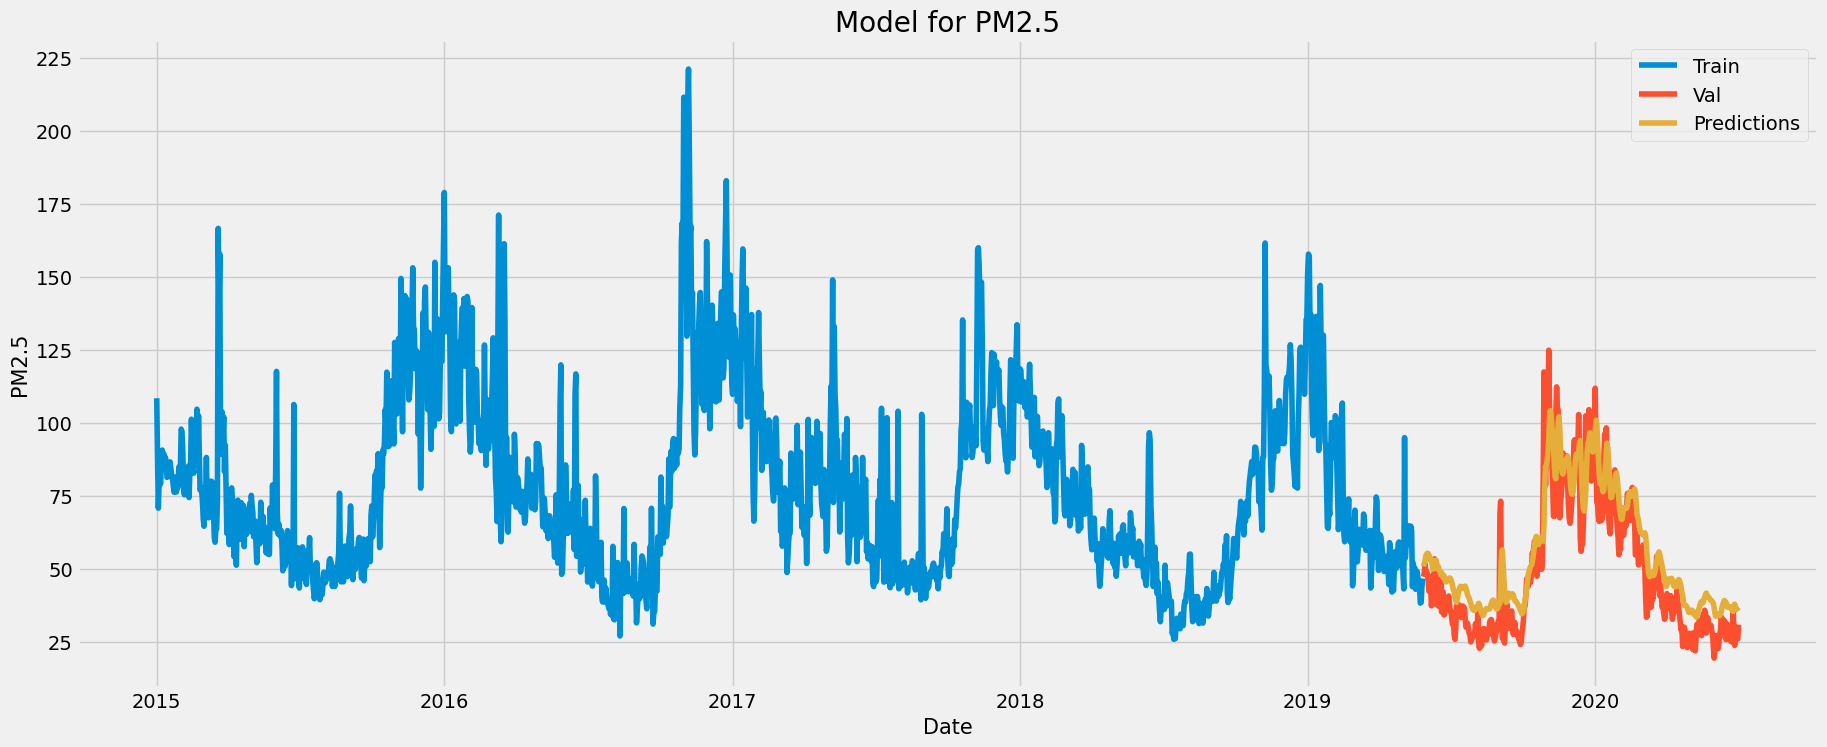

In [80]:
plt.figure(figsize=(20,8))
plt.title("Model for PM2.5")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("PM2.5",fontsize=15)
plt.plot(train[df_date.columns])
plt.plot(valid['PM2.5'])
plt.plot(valid["Predictions"])
plt.legend(["Train","Val","Predictions"])

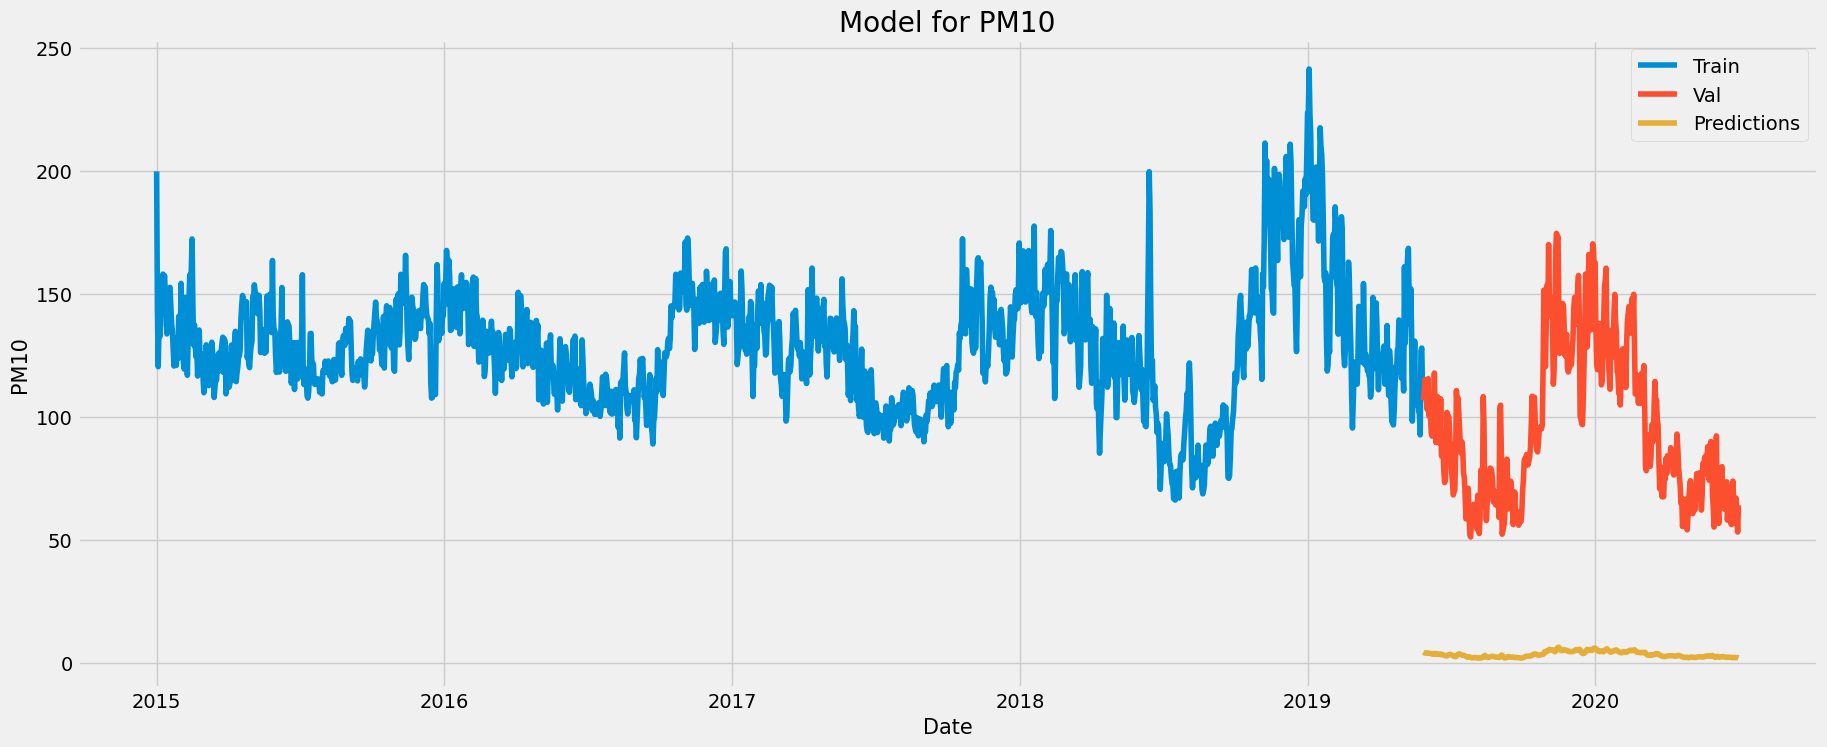

In [118]:
plt.figure(figsize=(20,8))
plt.title("Model for PM10")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("PM10",fontsize=15)
plt.plot(train2[df_pm10.columns])
plt.plot(valid2['PM10'])
plt.plot(valid2["Predictions"])
plt.legend(["Train","Val","Predictions"])

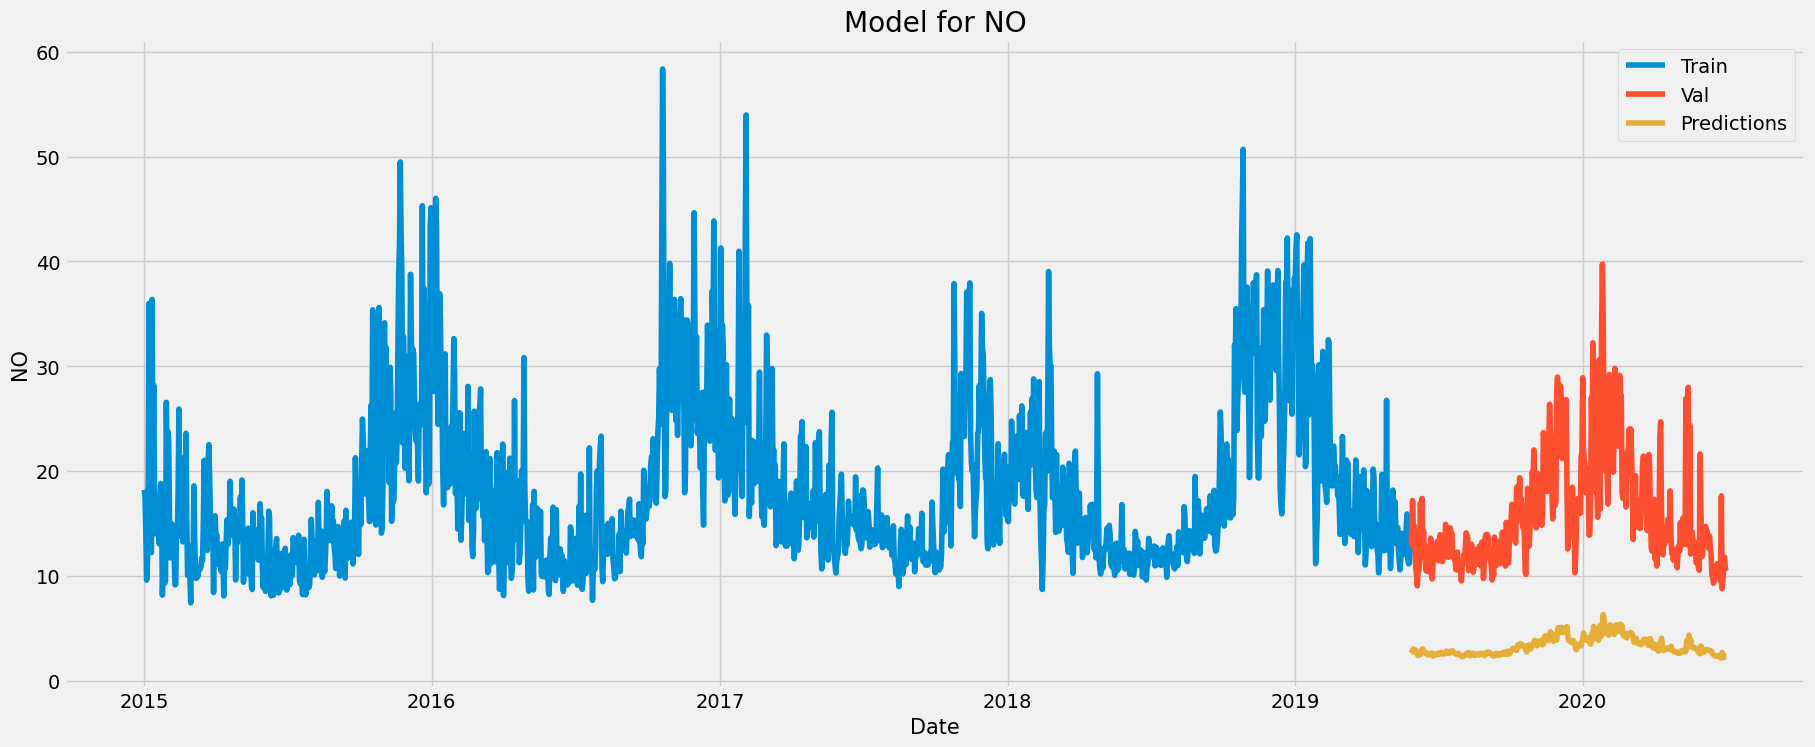

In [119]:
plt.figure(figsize=(20,8))
plt.title("Model for NO")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("NO",fontsize=15)
plt.plot(train3[df_NO.columns])
plt.plot(valid3['NO'])
plt.plot(valid3["Predictions"])
plt.legend(["Train","Val","Predictions"])

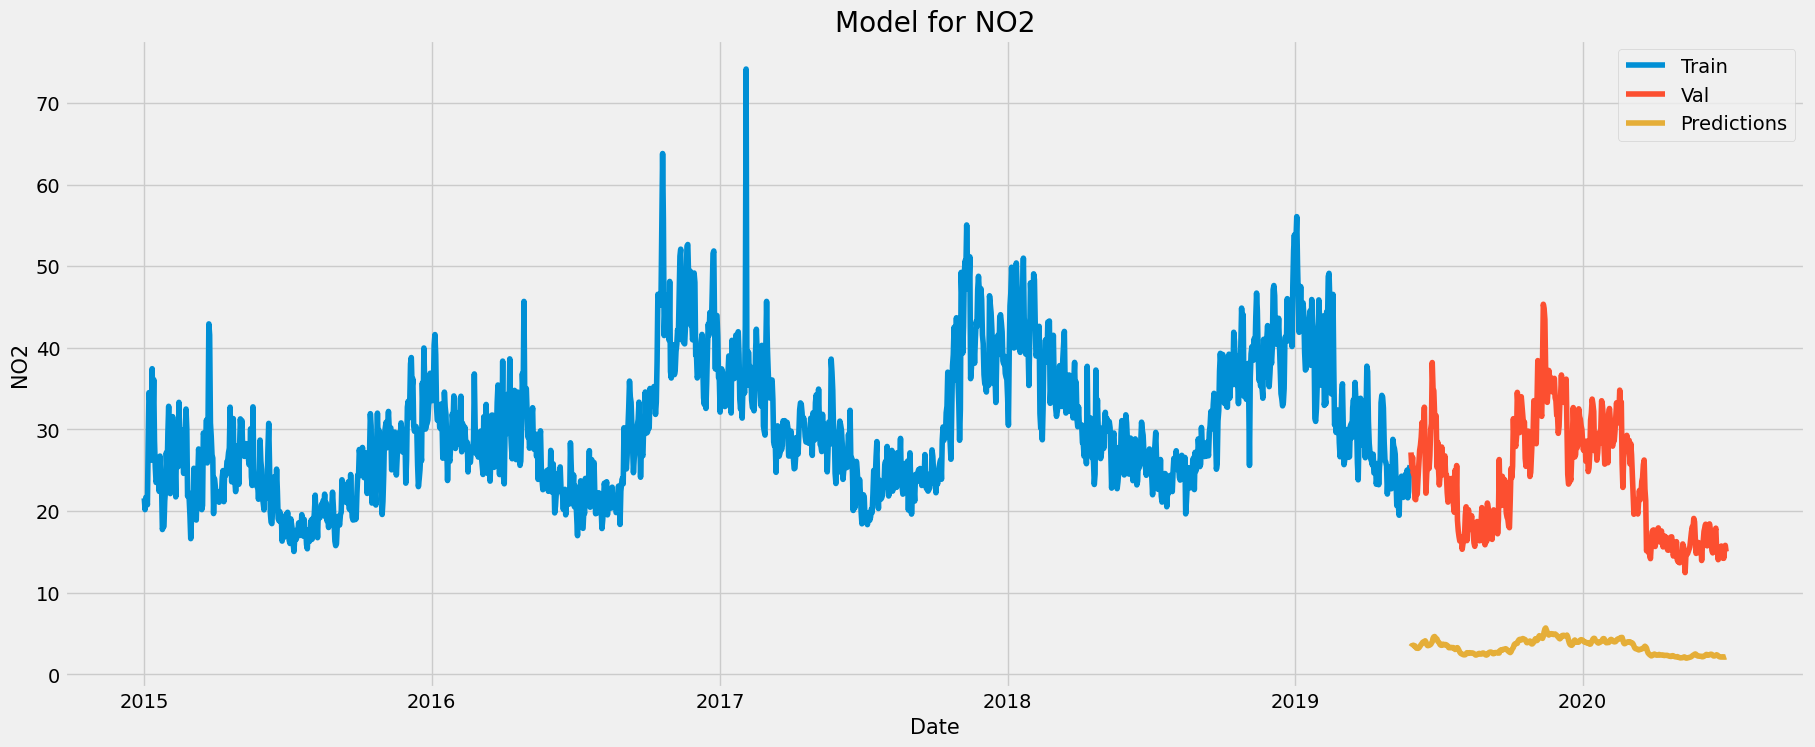

In [120]:
plt.figure(figsize=(20,8))
plt.title("Model for NO2")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("NO2",fontsize=15)
plt.plot(train4[df_NO2.columns])
plt.plot(valid4['NO2'])
plt.plot(valid4["Predictions"])
plt.legend(["Train","Val","Predictions"])

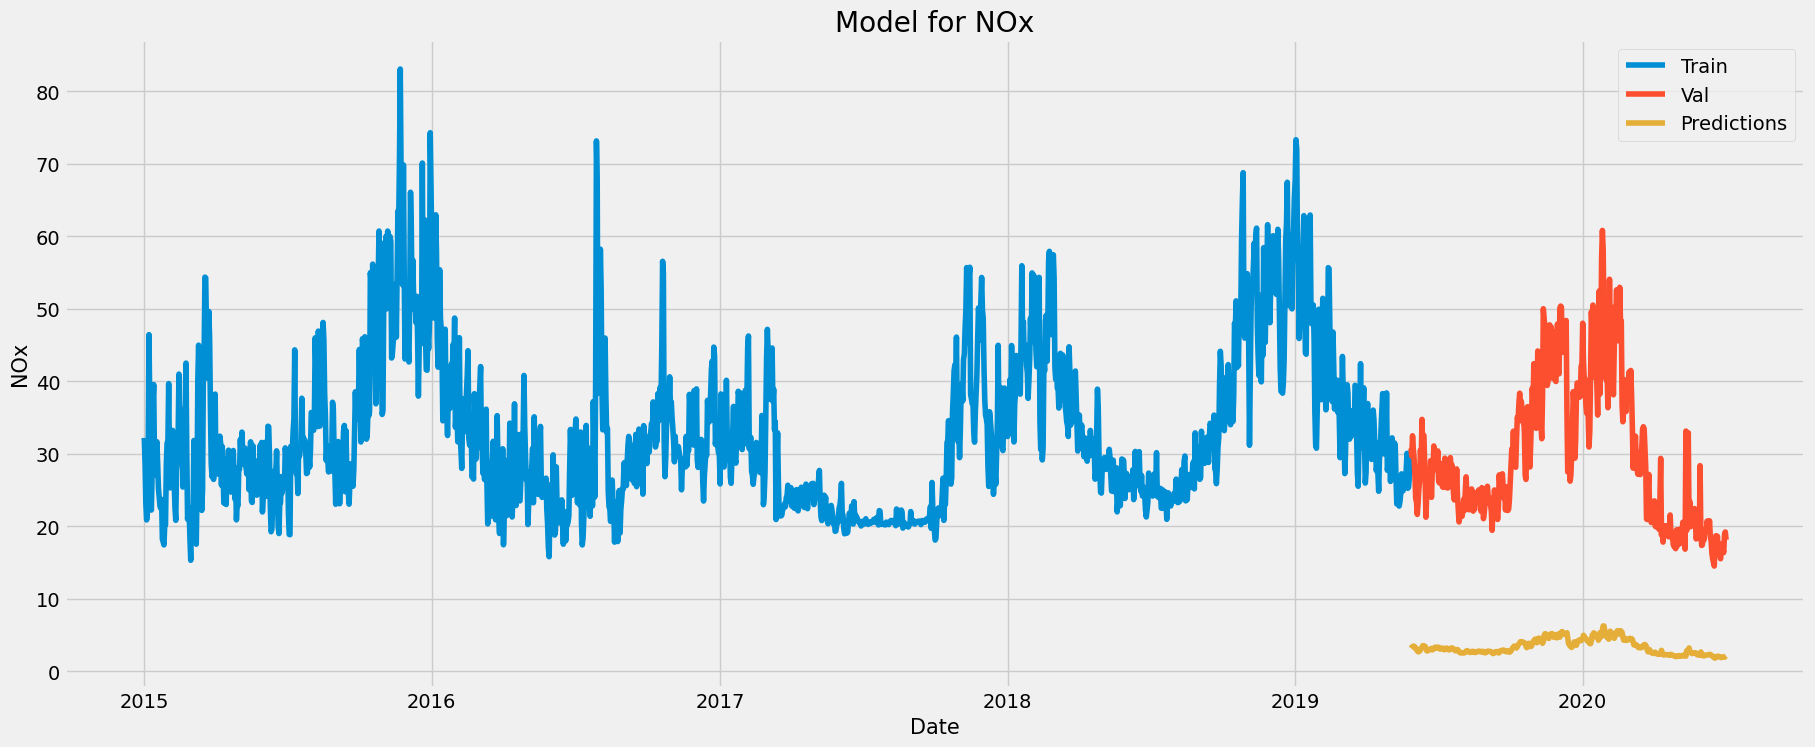

In [121]:
plt.figure(figsize=(20,8))
plt.title("Model for NOx")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("NOx",fontsize=15)
plt.plot(train5[df_NOx.columns])
plt.plot(valid5['NOx'])
plt.plot(valid5["Predictions"])
plt.legend(["Train","Val","Predictions"])

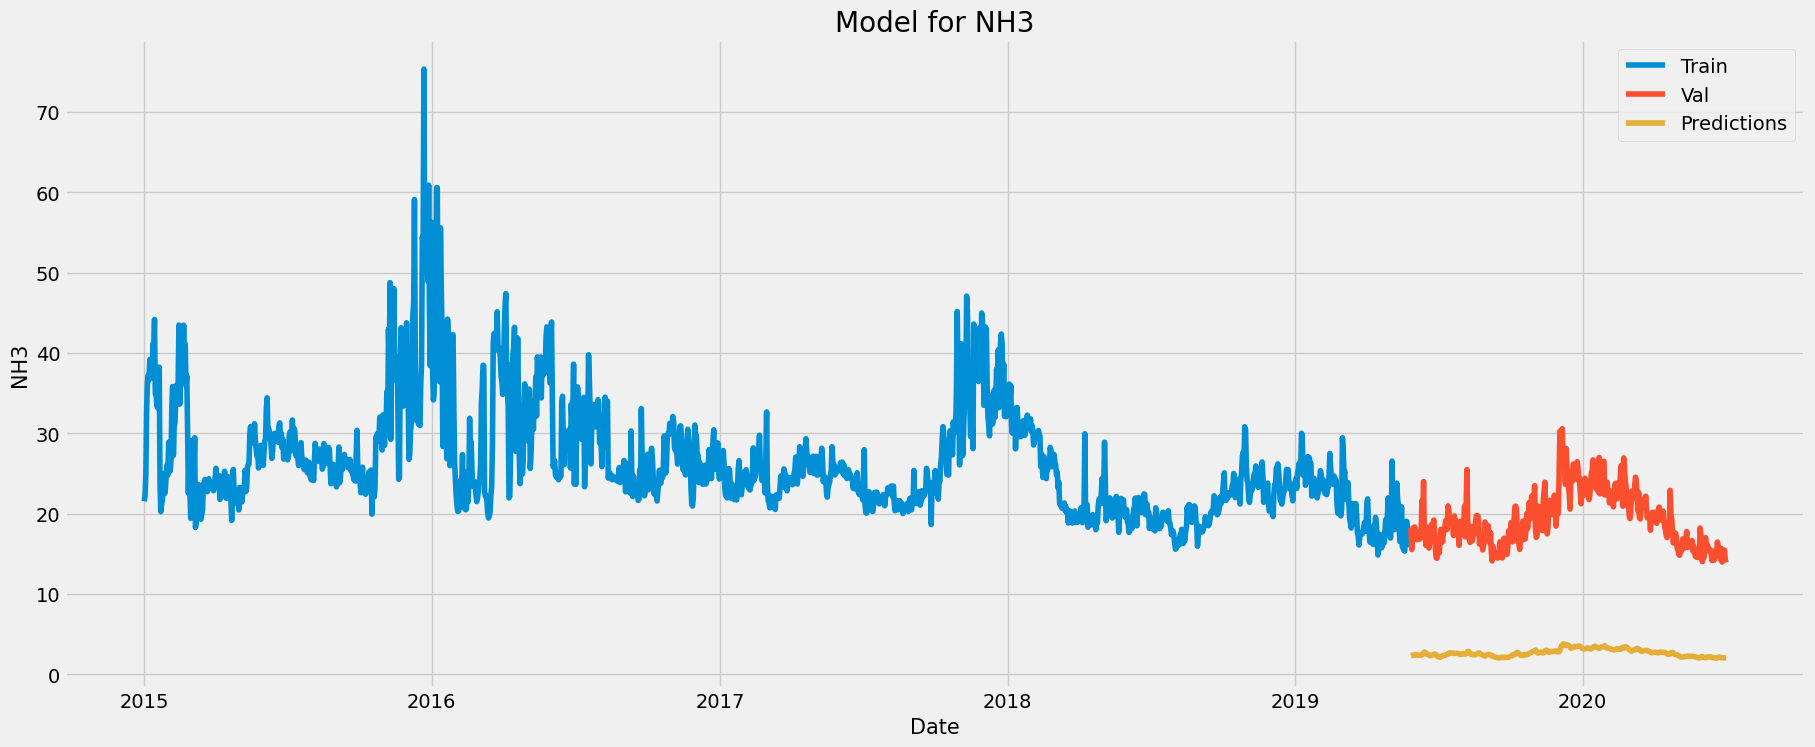

In [122]:
plt.figure(figsize=(20,8))
plt.title("Model for NH3")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("NH3",fontsize=15)
plt.plot(train6[df_NH3.columns])
plt.plot(valid6['NH3'])
plt.plot(valid6["Predictions"])
plt.legend(["Train","Val","Predictions"])

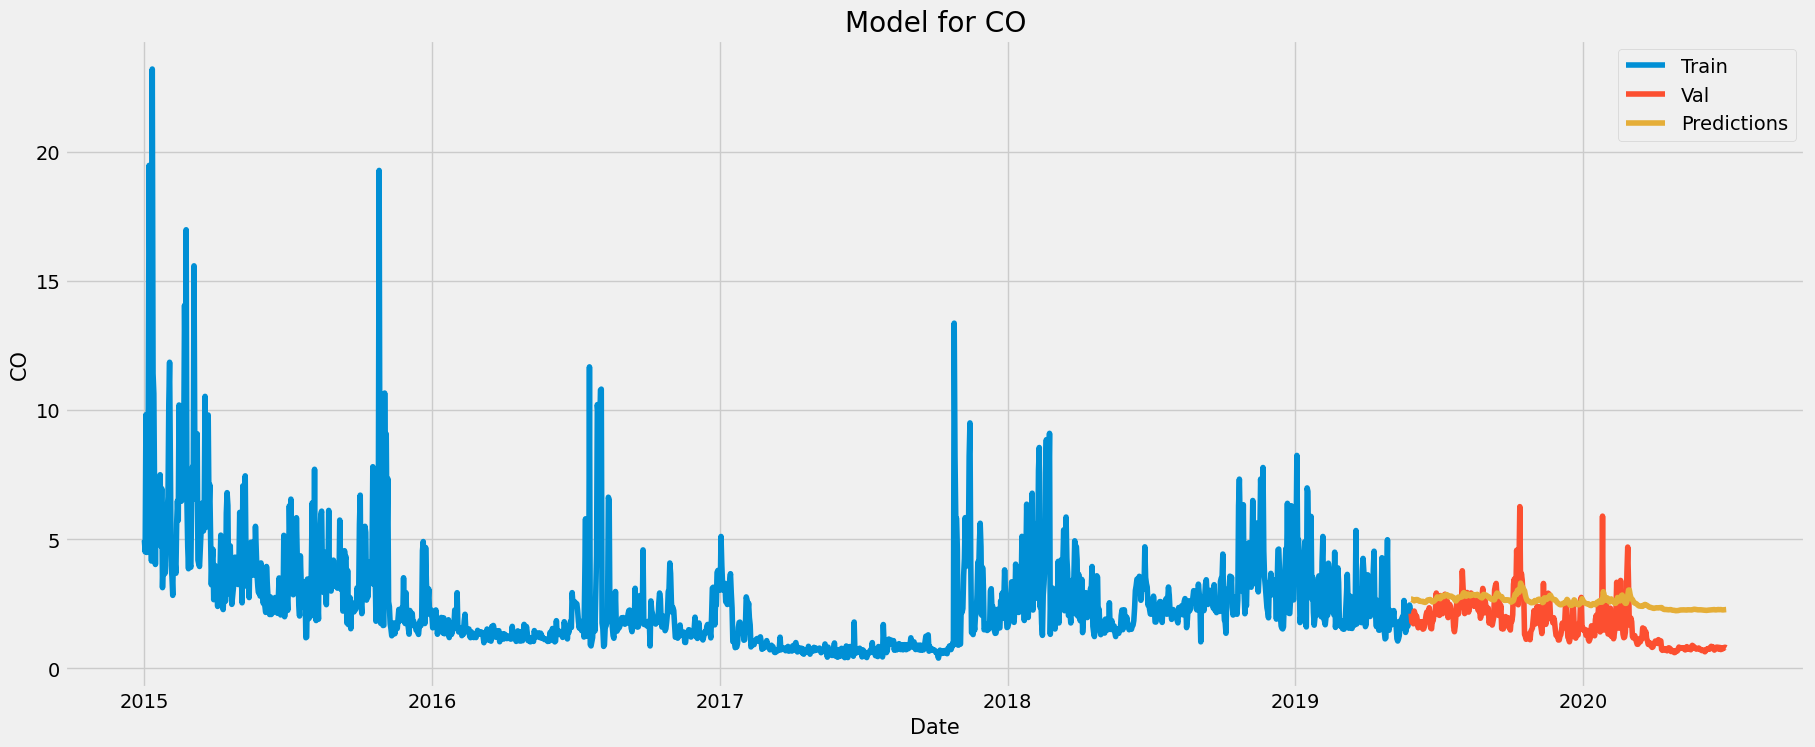

In [123]:
plt.figure(figsize=(20,8))
plt.title("Model for CO")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("CO",fontsize=15)
plt.plot(train7[df_CO.columns])
plt.plot(valid7['CO'])
plt.plot(valid7["Predictions"])
plt.legend(["Train","Val","Predictions"])

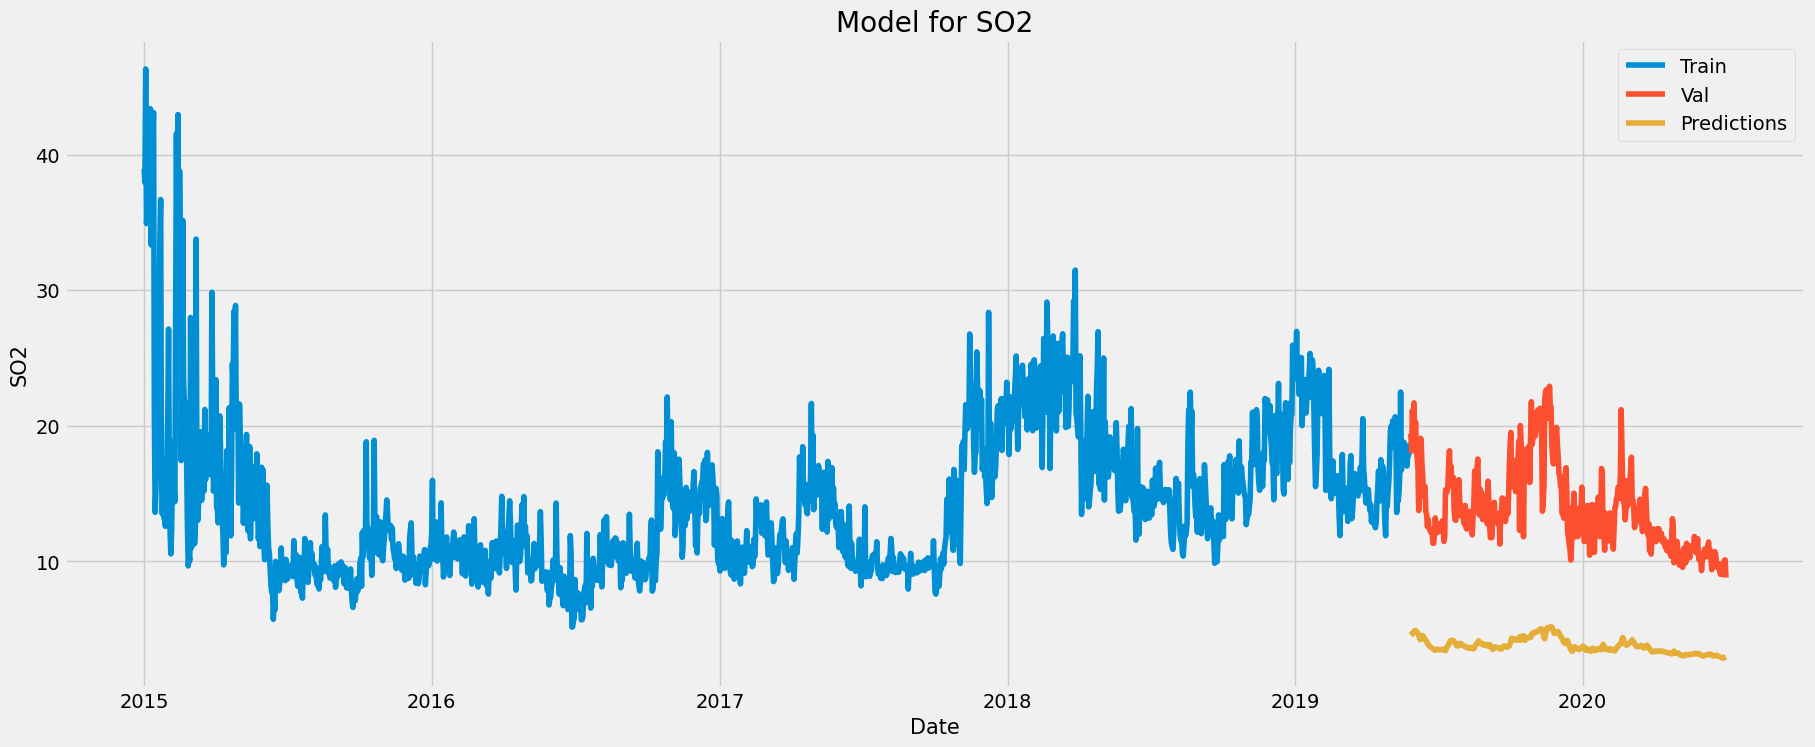

In [124]:
plt.figure(figsize=(20,8))
plt.title("Model for SO2")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("SO2",fontsize=15)
plt.plot(train8[df_SO2.columns])
plt.plot(valid8['SO2'])
plt.plot(valid8["Predictions"])
plt.legend(["Train","Val","Predictions"])

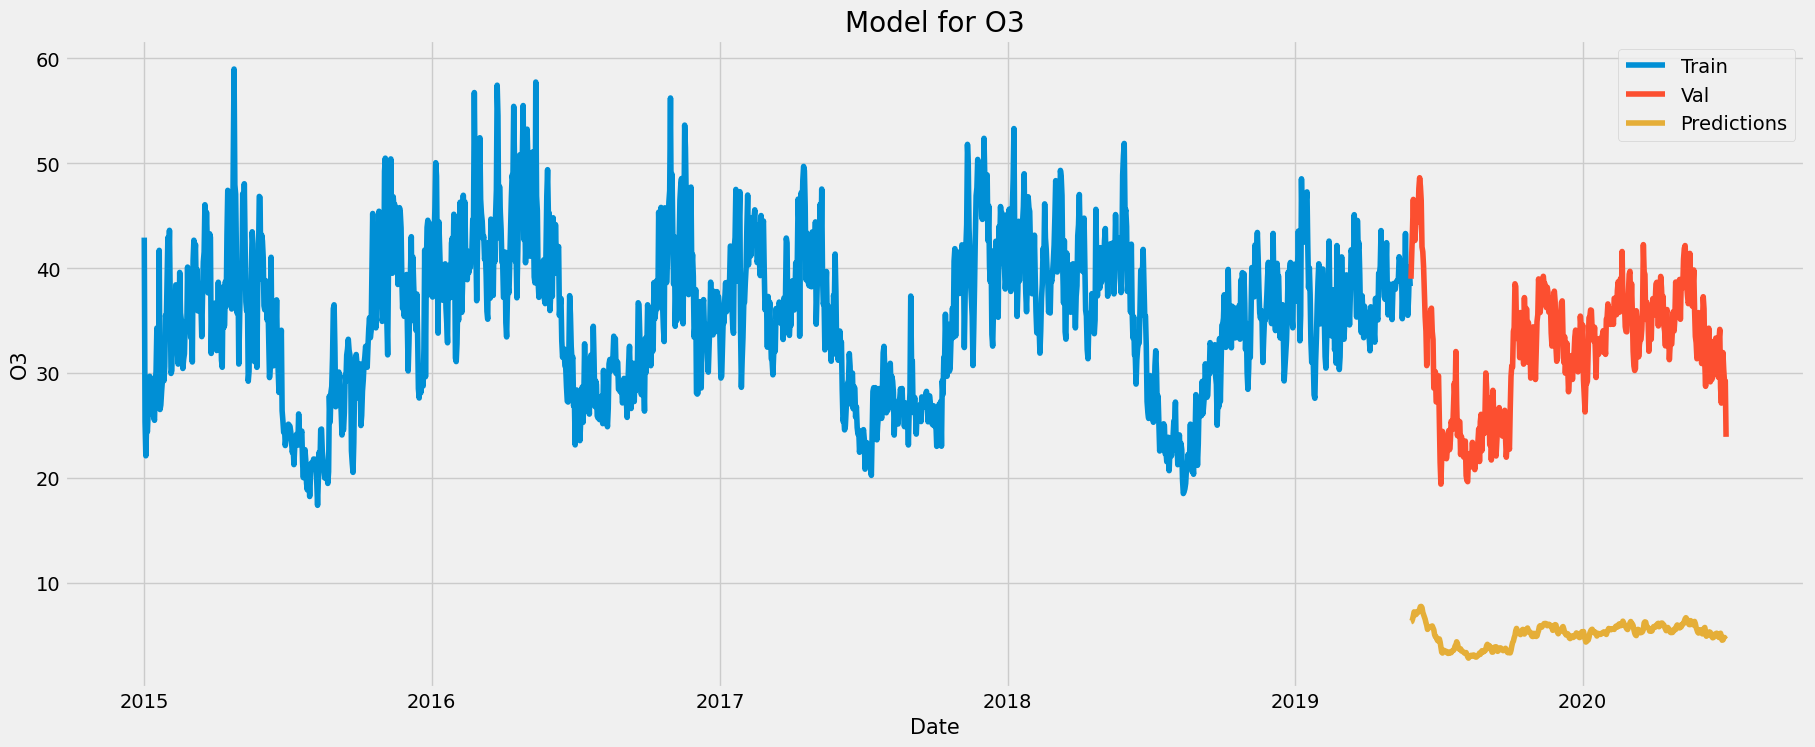

In [125]:
plt.figure(figsize=(20,8))
plt.title("Model for O3")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("O3",fontsize=15)
plt.plot(train9[df_O3.columns])
plt.plot(valid9['O3'])
plt.plot(valid9["Predictions"])
plt.legend(["Train","Val","Predictions"])

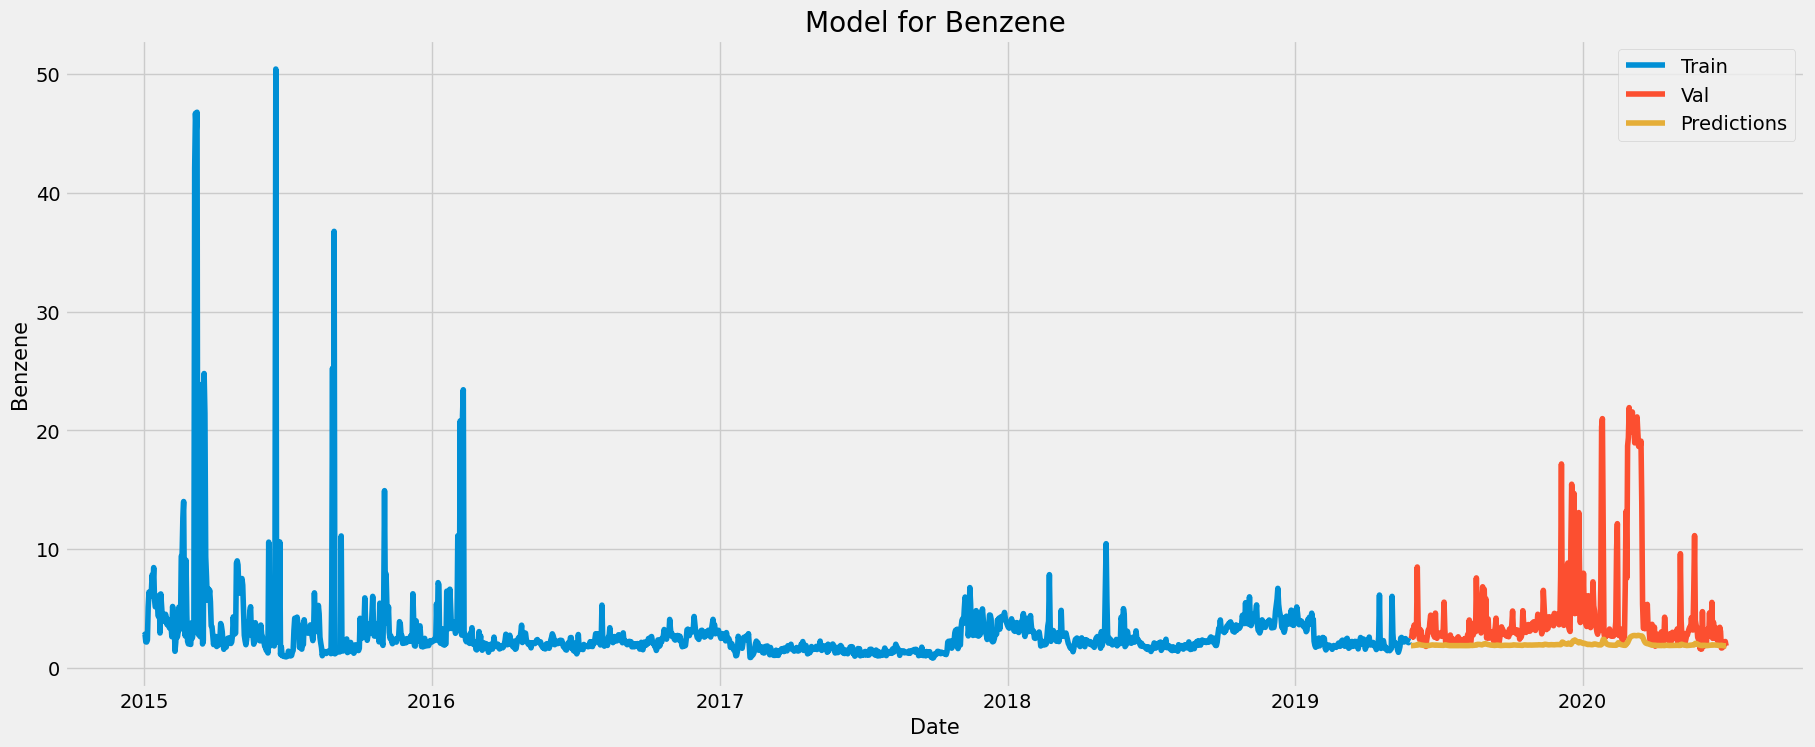

In [126]:
plt.figure(figsize=(20,8))
plt.title("Model for Benzene")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Benzene",fontsize=15)
plt.plot(train10[df_Ben.columns])
plt.plot(valid10['Benzene'])
plt.plot(valid10["Predictions"])
plt.legend(["Train","Val","Predictions"])

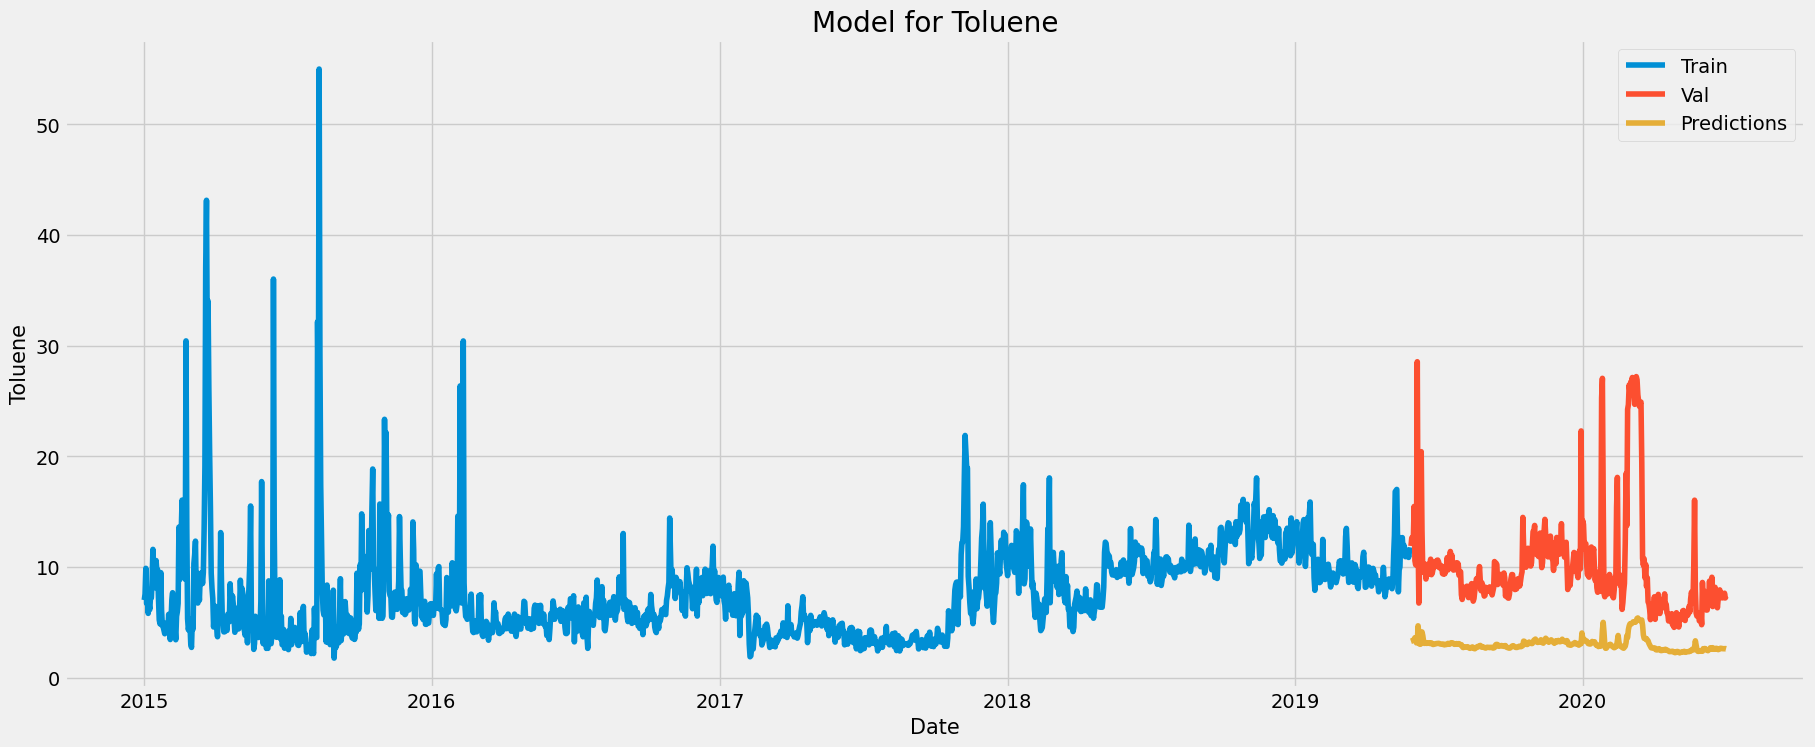

In [128]:
plt.figure(figsize=(20,8))
plt.title("Model for Toluene")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Toluene",fontsize=15)
plt.plot(train11[df_Tol.columns])
plt.plot(valid11['Toluene'])
plt.plot(valid11["Predictions"])
plt.legend(["Train","Val","Predictions"])

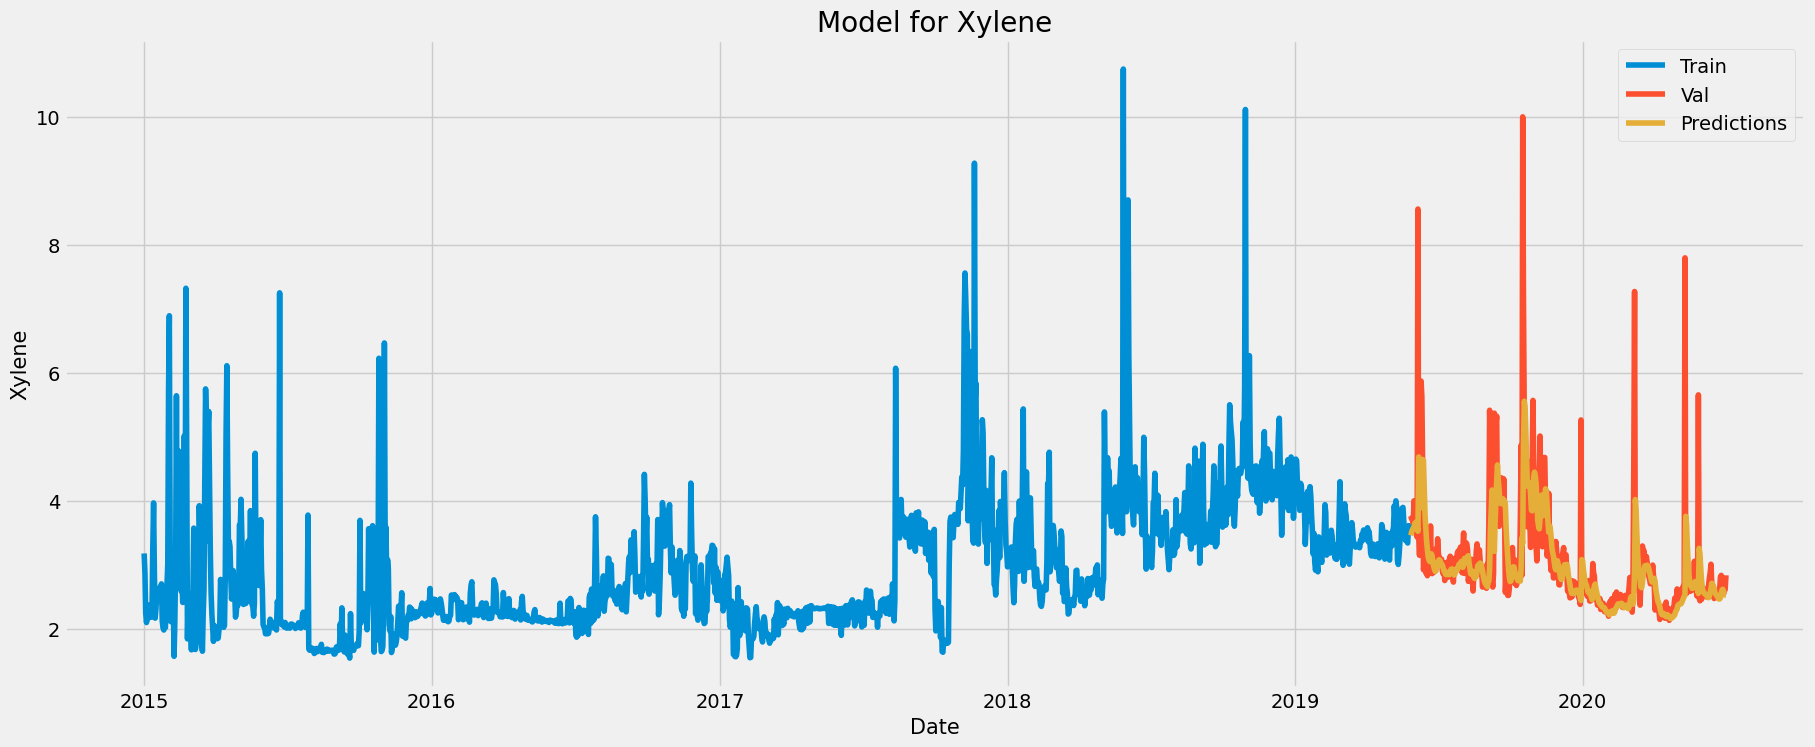

In [129]:
plt.figure(figsize=(20,8))
plt.title("Model for Xylene")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Xylene",fontsize=15)
plt.plot(train12[df_Xyl.columns])
plt.plot(valid12['Xylene'])
plt.plot(valid12["Predictions"])
plt.legend(["Train","Val","Predictions"])